# Machine Learning Assignment-1

### Submitted by
- Shourya - 00314811621
- Gautam Jain - 00814811621

# Data Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/gautamjain1503/kidney_stone_prediction/main/data/train.csv")
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [3]:
df.drop("id", axis=1, inplace=True)

In [4]:
X = df.drop("target", axis=1)
y = df.target

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


## Feature Selection

In [6]:
corr = df.corr()

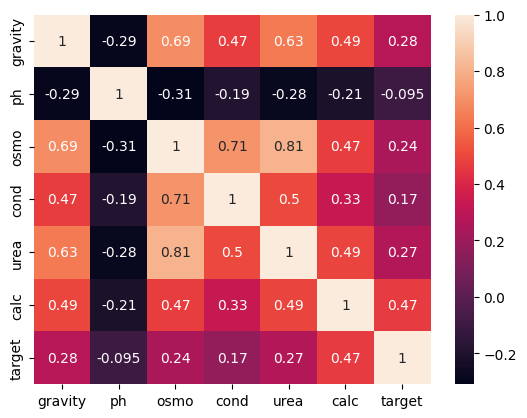

In [7]:
from seaborn import heatmap
heatmap(corr, annot=True);

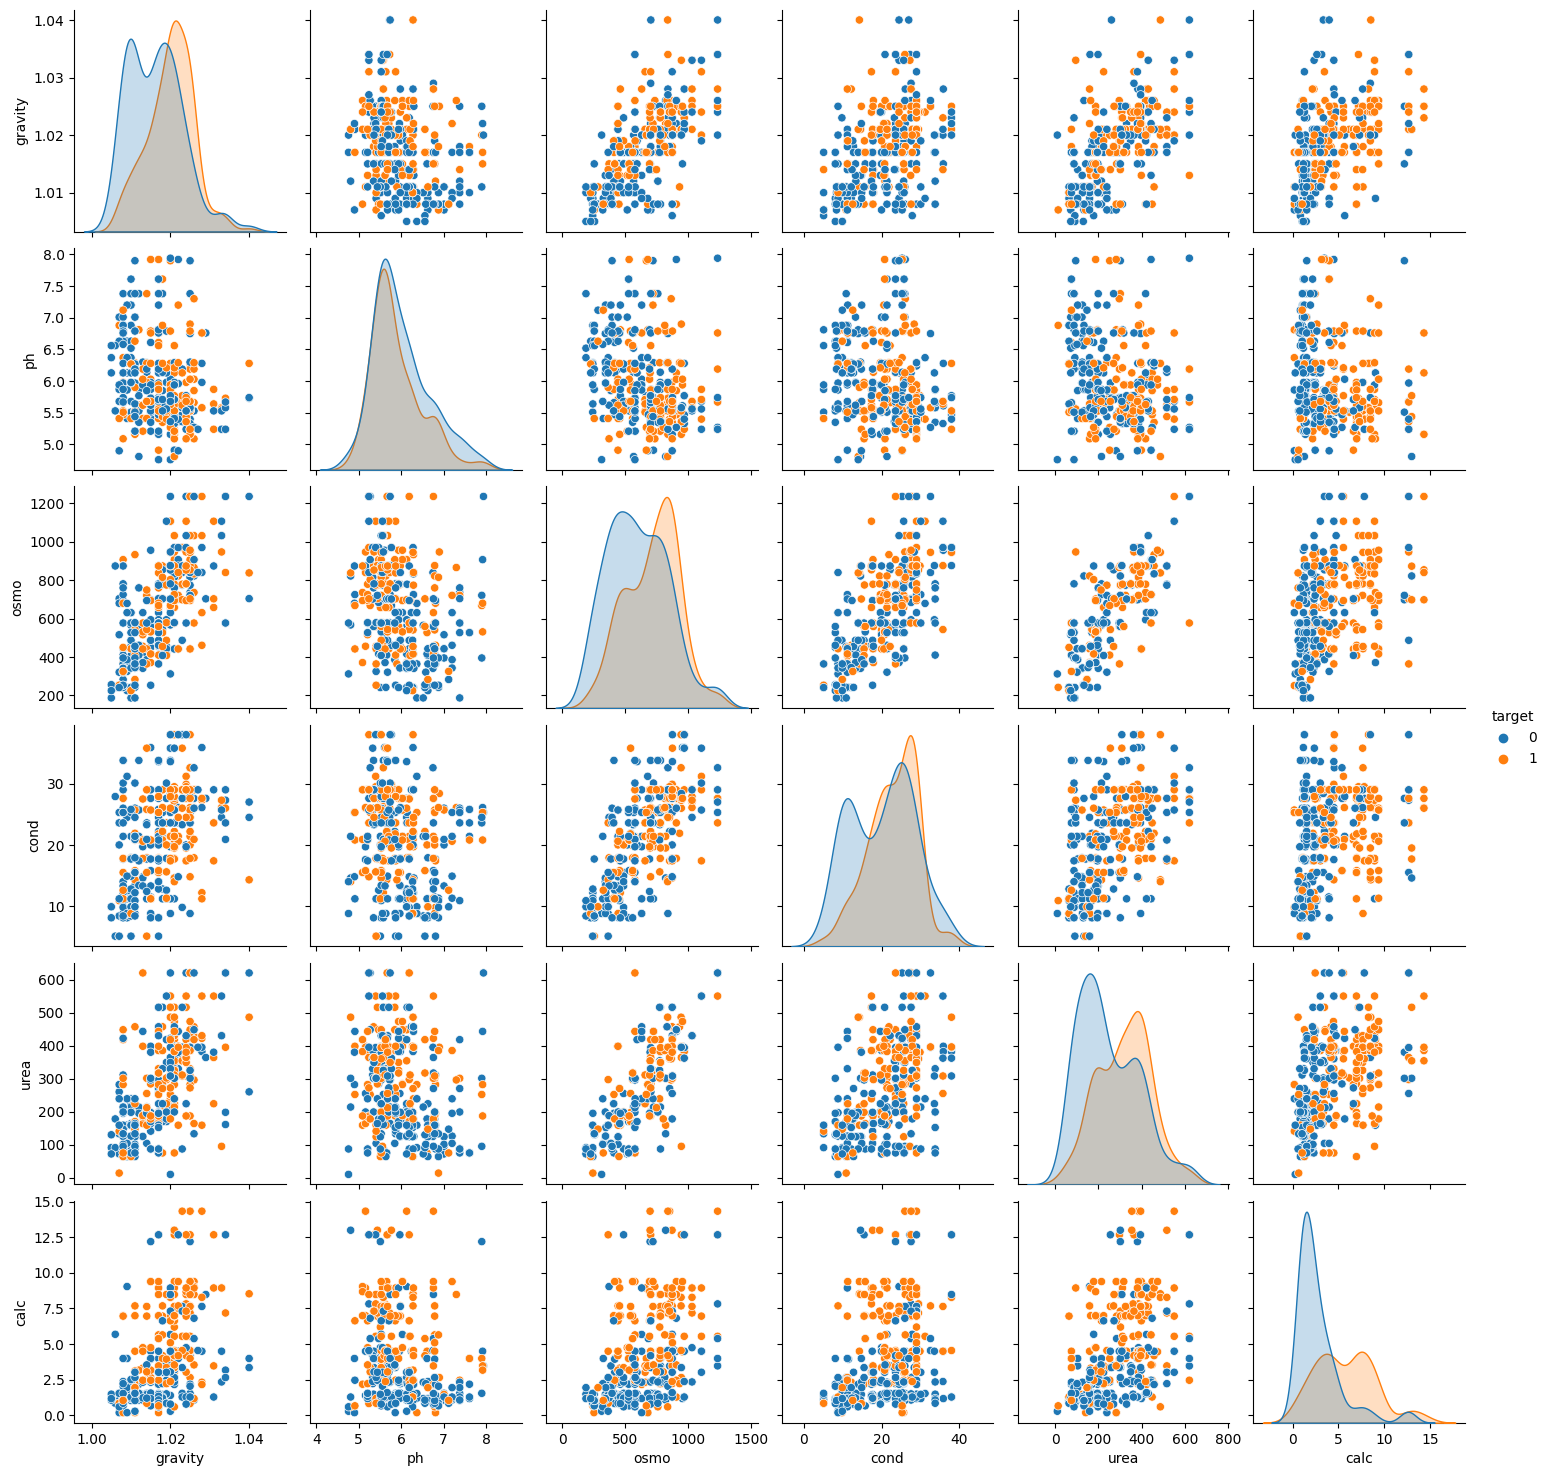

In [8]:
from seaborn import pairplot
pairplot(df, hue="target")

In [9]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)

LassoCV()

In [10]:
print(f"Score from built-in LassoCV: {reg.score(X, y)}")

Score from built-in LassoCV: 0.2180202565178796


In [11]:
coef = reg.coef_
coef

array([0.00000000e+00, 0.00000000e+00, 4.86213047e-06, 0.00000000e+00,
       2.59671700e-04, 6.03363055e-02])

In [12]:
print(f"LassoCV uses {sum(coef != 0)} and eliminates {sum(coef == 0)} variables")

LassoCV uses 3 and eliminates 3 variables


In [13]:
coef = pd.Series(coef, index = X.columns)

<Axes: >

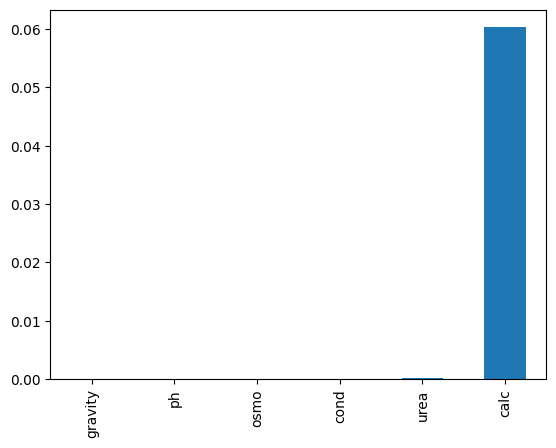

In [14]:
coef.plot.bar()

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [16]:
X1 = pd.DataFrame(X1, columns=X.columns)
X1.head()

,gravity,ph,osmo,cond,urea,calc
0,-0.734032,0.365623,-0.889728,-0.884388,-1.134869,-0.829136
1,1.065904,-0.865897,0.219521,0.288059,0.846384,0.020338
2,-1.334010,0.272090,-1.196904,0.407969,-0.878040,1.532589
3,0.465925,-1.629751,-0.893994,-0.084992,0.875736,0.782687
4,0.465925,-0.663242,0.949065,-0.484690,0.780342,-0.592652


# Splitting Dataset

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(30)

X_tr, X_te, y_tr, y_te = train_test_split(X1, y)

# Ensemble Algorithms

XGBoost and Random Forest are ensemble learning methods. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

1. **Bagging**:  While decision trees are one of the most easily interpretable models, they exhibit highly variable behavior. Consider a single training dataset that we randomly split into two parts. Now, let's use each part to train a decision tree in order to obtain two models.When we fit both these models, they would yield different results. Decision trees are said to be associated with high variance due to this behavior. Bagging or boosting aggregation helps to reduce the variance in any learner. Several decision trees which are generated in parallel, form the base learners of bagging technique. Data sampled with replacement is fed to these learners for training. The final prediction is the averaged output from all the learners. Random Forest is an example of bagging ensembling technique.



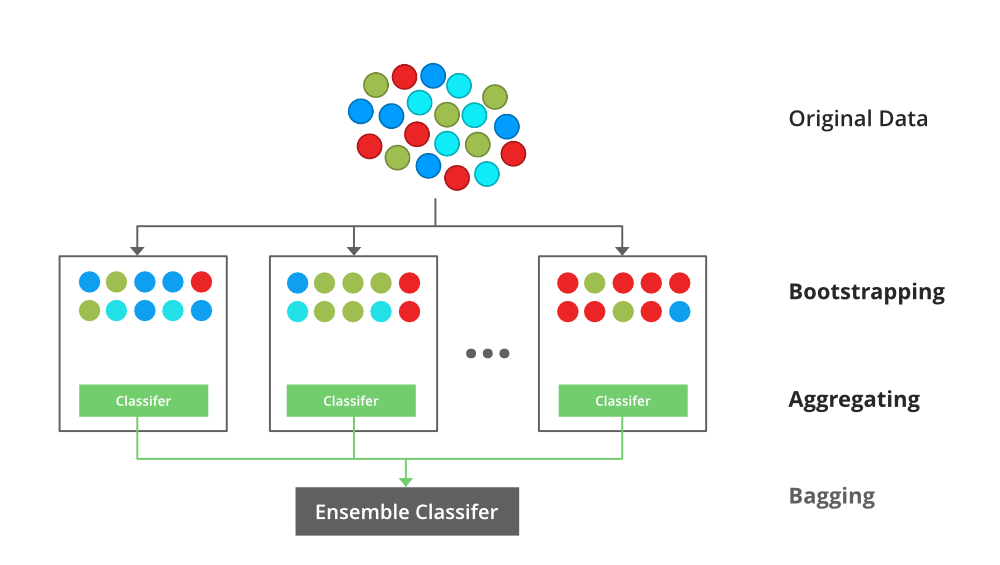

2. **Boosting** :
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals. The base classifiers in boosting are weak classifiers in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak classifiers contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak classifiers. The final strong learner brings down both the bias and the variance. XGBoost is an example of boosting ensembling technique.

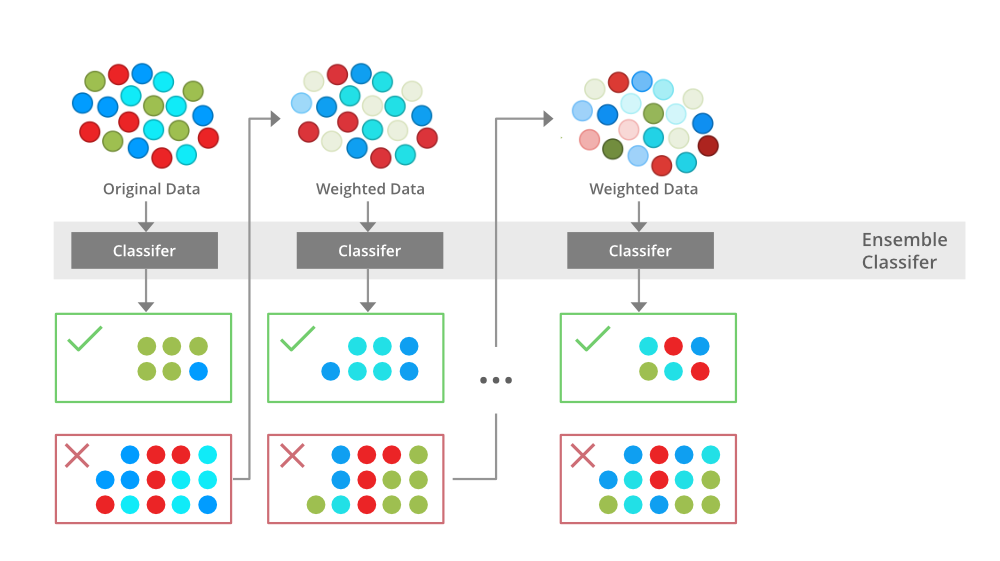

## Unique Features of XGBoost


* **Regularization**: XGBoost has an option to penalize complex models through both L1 and L2 regularization. Regularization helps in preventing overfitting
* **Handling sparse data**: Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data
* **Weighted quantile sketch**: Most existing tree based algorithms can find the split points when the data points are of equal weights (using quantile sketch algorithm). However, they are not equipped to handle weighted data. XGBoost has a distributed weighted quantile sketch algorithm to effectively handle weighted data
* **Block structure for parallel learning**: For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling
* **Cache awareness**: In XGBoost, non-continuous memory access is required to get the gradient statistics by row index. Hence, XGBoost has been designed to make optimal use of hardware. This is done by allocating internal buffers in each thread, where the gradient statistics can be stored
* **Out-of-core computing**: This feature optimizes the available disk space and maximizes its usage when handling huge datasets that do not fit into memory

## Unique Features of Random Forest

* **Diversity**: Not all attributes/variables/features are considered while making an individual tree; each tree is different.
* **Immune to the curse of dimensionality**: Since each tree does not consider all the features, the feature space is reduced.
* **Parallelization**: Each tree is created independently out of different data and attributes. This means we can fully use the CPU to build random forests.
* **Train-Test split**: In a random forest, we don't have to necessarily segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.
* **Stability**: Stability arises because the result is based on majority voting/ averaging.

# Random Forest Model(Bagging)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
model.score(X_te, y_te)

0.7596153846153846

## Hyperparameter Tuning

In [19]:
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [20]:
rf_cv = GridSearchCV(model, rf_param_grid, n_jobs = -1, cv = 5)
rf_cv.fit(X_tr, y_tr)
rf_cv.score(X_te, y_te)

0.7788461538461539

In [21]:
from sklearn.metrics import confusion_matrix

<Axes: >

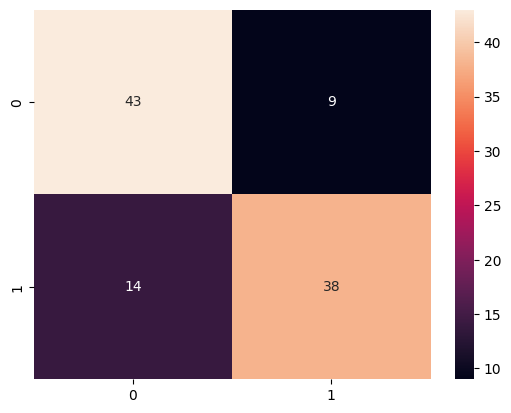

In [22]:
cm = confusion_matrix(y_te , rf_cv.predict(X_te))
sns.heatmap(cm, annot = True)

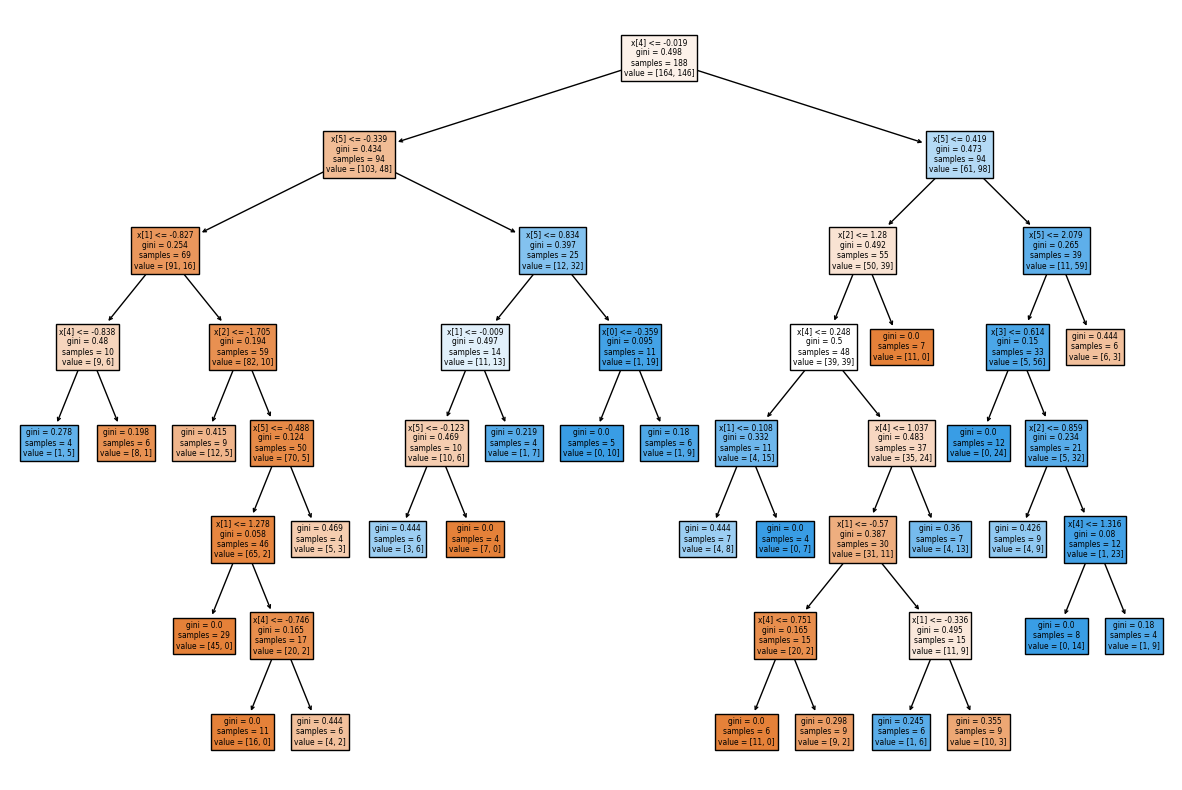

In [23]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(rf_cv.best_estimator_[10],filled=True);

In [24]:
import joblib

joblib.dump(rf_cv,"rfc_best_model.pkl")

['rfc_best_model.pkl']

In [25]:
saved_model_rfc=joblib.load("rfc_best_model.pkl")

# XGBoost model(Boosting)

In [26]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [27]:
model.fit(X_tr, y_tr)
model.score(X_te, y_te)

0.75

### Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "eta": [0.01, 0.3, 0.1, 0.2],
    "max_depth": [3, 4, 5, 7, 10],
    "learning_rate": [0.2, 0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.5, 1],
}

clf = xgb.XGBClassifier()
model_cv = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 5, scoring="roc_auc")
model_cv.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'eta': [0.01, 0.3, 0.1, 0.2], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.2, 0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7, 10],
                         'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8, 1]},
             scoring='roc_auc')

In [29]:
model_cv.score(X_te, y_te)

0.7818047337278107

In [30]:
model_cv.best_params_

{'colsample_bytree': 1,
 'eta': 0.01,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 1}

In [31]:
import joblib

joblib.dump(model_cv,"xgboost_best_model.pkl")

['xgboost_best_model.pkl']

In [32]:
saved_model_xg=joblib.load("xgboost_best_model.pkl")

<Axes: >

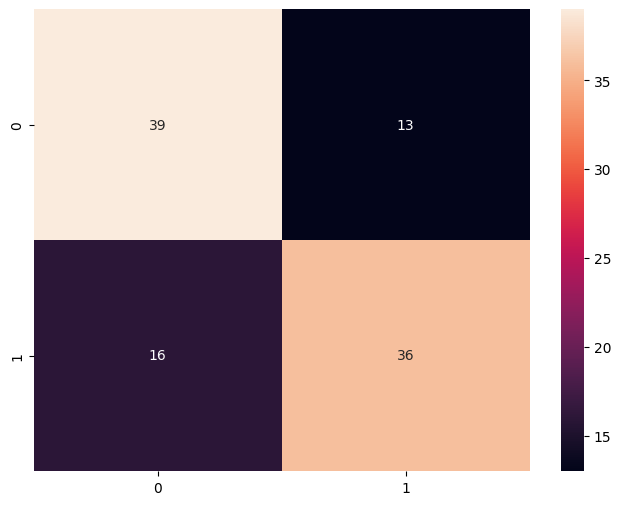

In [33]:
cm = confusion_matrix(y_te , model_cv.predict(X_te))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)

# Catboost

In [34]:
train_df = pd.read_csv("https://raw.githubusercontent.com/gautamjain1503/kidney_stone_prediction/main/data/train.csv")

In [35]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [36]:
train_df.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [37]:
train_df["target"]=train_df["target"].astype("bool")

In [38]:
import catboost as cb
from sklearn.metrics import accuracy_score

In [39]:
X=train_df.drop(["id", "target"], axis=1)
y=train_df["target"]

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((331, 6), (83, 6), (331,), (83,))

In [40]:
model_cat= cb.CatBoostClassifier()
model_cat.fit(X_train, y_train,verbose=0)

In [41]:
model_cat_predict = model_cat.predict(X_test)

for i in range(len(model_cat_predict)):
  if model_cat_predict[i] == "True" :
    model_cat_predict[i] = 1
  else:
    model_cat_predict[i] = 0
    
model_cat_predict = model_cat_predict.astype(bool)
accuracy_score(y_test , model_cat_predict)

0.7469879518072289

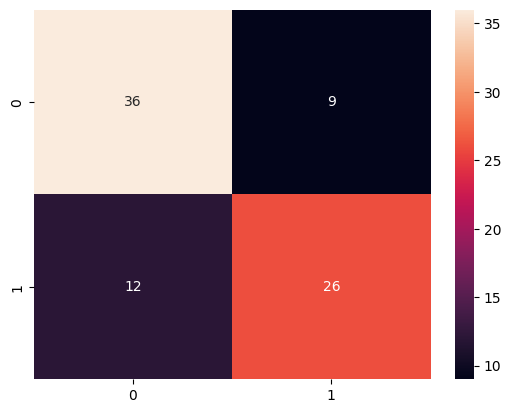

In [42]:
cm = confusion_matrix(y_test , model_cat_predict)
sns.heatmap(cm, annot = True);

In [43]:
test_df = pd.read_csv("https://raw.githubusercontent.com/gautamjain1503/kidney_stone_prediction/main/data/test.csv")
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [44]:
test_data = test_df.drop("id",axis=1)
test_predictions = model_cat.predict(test_data)

for i in range(len(test_predictions)):
  if test_predictions[i] == "True" :
    test_predictions[i] = 1
  else:
    test_predictions[i] = 0
test_predictions = test_predictions.astype(bool)

test_predictions

array([False,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True,

In [45]:
submission_data = pd.DataFrame({"id":test_df["id"],
                                "target":test_predictions})
submission_data.head()

,id,target
0,414,False
1,415,True
2,416,True
3,417,True
4,418,False


In [46]:
submission_data.to_csv("cat_boost_submission.csv", index=False)

# Naive Bayes model

## Conditional Probability(Bayes Theorem)


> Conditional probability is defined as the likelihood of an event or outcome occurring, based on the occurrence of a previous event or outcome. Conditional probability is calculated by multiplying the probability of the preceding event by the updated probability of the succeeding, or conditional, event.

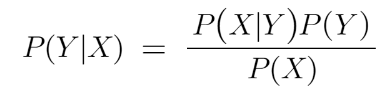

where Y => Class of Variable
, X => Dependent Feature

Bayes theorem provides us with the formula for the probability of Y given some feature X. In real-world problems, we hardly find any case where there is only one feature.

When the features are independent, we can extend Bayes theorem to what is called Naive Bayes which assumes that the features are independent that means changing the value of one feature doesn't influence the values of other variables and this is why we call this algorithm "NAIVE"

Naive Bayes can be used for various things like face recognition, weather prediction, Medical Diagnosis, News classification, Sentiment Analysis, and a lot more.

When there are multiple X variables, we simplify it by assuming that X's are independent, so for n variables:

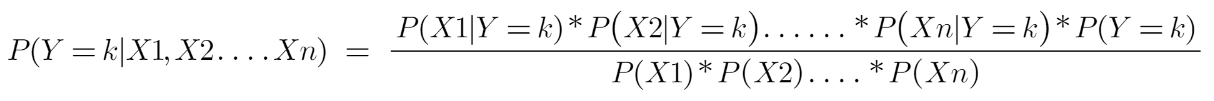

## Gaussian Naive Bayes

Gaussian Naïve Bayes is used when we assume all the continuous variables associated with each feature to be distributed according to Gaussian Distribution. Gaussian Distribution is also called Normal distribution.
The conditional probability changes here since we have different values now. Also, the (PDF)  probability density function of a normal distribution is given by:

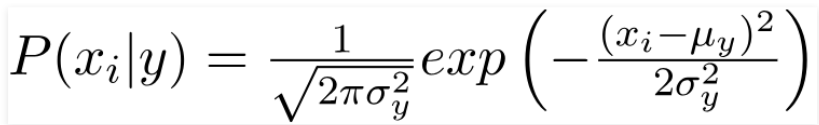

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_tr, y_tr)
model.score(X_te, y_te)

0.6923076923076923

<Axes: >

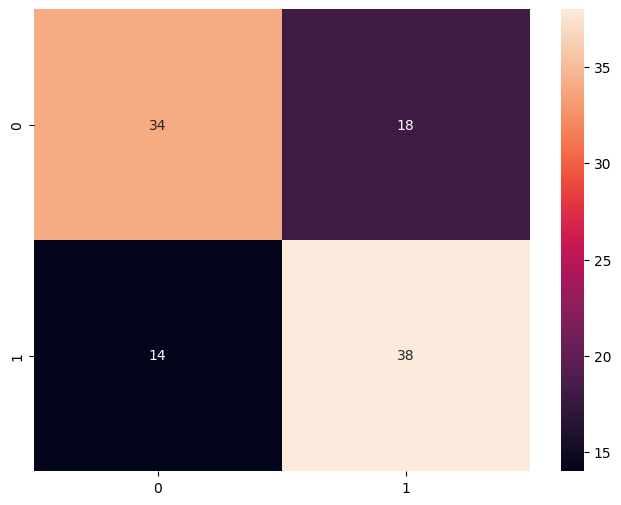

In [48]:
cm = confusion_matrix(y_te , model.predict(X_te))
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True)